In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import os.path as osp

measurements = pd.read_csv('pca_version.txt', sep='\s+', names = ['wavelength', 'PC1_1', 'PC1_2', 'PC2_1', 'PC2_2'])
central_wav = 15272
measurements

,wavelength,PC1_1,PC1_2,PC2_1,PC2_2
0,15257.029993,0.012900,0.000841,0.000008,0.000796
1,15257.240778,0.012967,0.000846,0.000008,0.000765
2,15257.451567,0.013562,0.000884,0.000008,0.000757
3,15257.662357,0.014260,0.000930,0.000010,0.000985
4,15257.873151,0.014333,0.000935,0.000010,0.000952
...,...,...,...,...,...
138,15286.145885,0.013572,0.000885,-0.000018,-0.001800
139,15286.357072,0.012743,0.000831,-0.000022,-0.002155
140,15286.568262,0.010742,0.000700,-0.000019,-0.001890
141,15286.779456,0.010156,0.000662,-0.000019,-0.001895


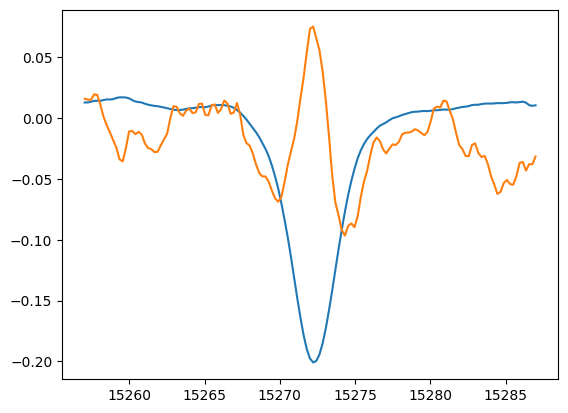

In [2]:
plt.plot(measurements['wavelength'], measurements['PC1_1'])
plt.plot(measurements['wavelength'], measurements['PC2_2']*20)


In [3]:
base = osp.expanduser('~/../../scratch/gpfs/cj1223/')
# base = ''
orig = h5py.File(base+'pgo_outputs_original.h5', 'r')
eps = h5py.File(base+'pgo_outputs_epsilon.h5', 'r')

orig['spectra'][:].shape, orig.keys(), orig['wavelengths'][:], orig['spectra'][:][:, 0, 0, 0, 0, 0]

((143, 4, 4, 9, 10, 2),
 <KeysViewHDF5 ['ab_values', 'c_values', 'fraction_ab', 'fraction_c', 'spectra', 'temperatures', 'wavelengths']>,
 array([15257.02999338, 15257.24077849, 15257.45156652, 15257.66235746,
        15257.87315131, 15258.08394807, 15258.29474775, 15258.50555034,
        15258.71635584, 15258.92716425, 15259.13797558, 15259.34878982,
        15259.55960697, 15259.77042703, 15259.98125001, 15260.19207589,
        15260.4029047 , 15260.61373641, 15260.82457104, 15261.03540858,
        15261.24624903, 15261.45709239, 15261.66793867, 15261.87878786,
        15262.08963997, 15262.30049498, 15262.51135291, 15262.72221376,
        15262.93307751, 15263.14394418, 15263.35481377, 15263.56568626,
        15263.77656167, 15263.98743999, 15264.19832123, 15264.40920538,
        15264.62009244, 15264.83098242, 15265.04187531, 15265.25277112,
        15265.46366983, 15265.67457146, 15265.88547601, 15266.09638347,
        15266.30729384, 15266.51820713, 15266.72912333, 15266.94004244

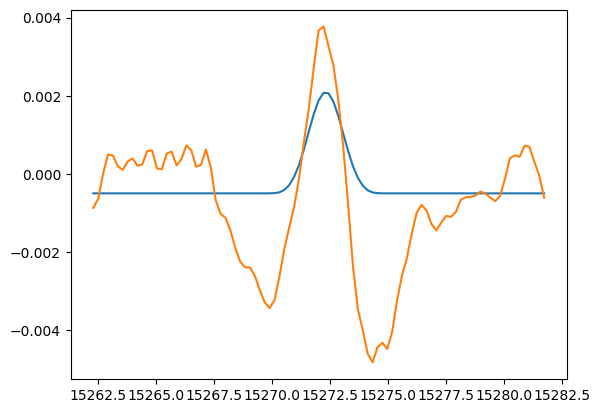

In [4]:
c = 25

diff = orig['spectra'][:][:, 0, 0, 0, 0, 0][c:-c] - eps['spectra'][:][:, 0, 0, 0, 0, 0][c:-c]
scalar = np.dot(measurements['PC2_2'][c:-c], diff)/np.dot(diff, diff)

plt.plot(measurements['wavelength'][c:-c], scalar*diff-0.0005)
plt.plot(measurements['wavelength'][c:-c], measurements['PC2_2'][c:-c])

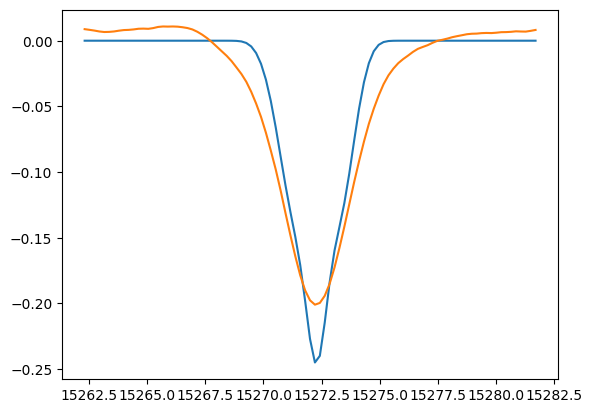

In [16]:
from scipy.ndimage import gaussian_filter
c = 25

diff = gaussian_filter( orig['spectra'][:][:, 2, 2, 1, 5, 0][c:-c], 1 )
scalar = np.dot(measurements['PC1_1'][c:-c], diff)/np.dot(diff, diff)

plt.plot(orig['wavelengths'][:][c:-c], scalar*diff)
plt.plot(measurements['wavelength'][c:-c], measurements['PC1_1'][c:-c])

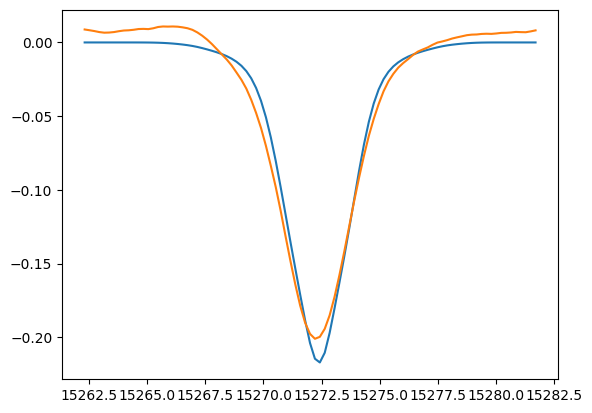

In [19]:
from scipy.signal import fftconvolve

def lorentzian_kernel(x, gamma):
    """
    Normalized Lorentzian kernel centered at 0.

    Parameters:
    x (array): Symmetric array centered at 0 (e.g., np.linspace(-10, 10, 1001))
    gamma (float): FWHM of the Lorentzian

    Returns:
    array: Lorentzian kernel normalized to unit area
    """
    L = (gamma**2 / 4) / (x**2 + (gamma**2 / 4))
    return L / np.trapz(L, x)

def lorentzian_convolve(signal, x, gamma):
    """
    Convolve a signal with a Lorentzian of width gamma.

    Parameters:
    signal (array): Your input signal (e.g., spectrum)
    x (array): The x-axis corresponding to the signal
    gamma (float): FWHM of the Lorentzian

    Returns:
    array: The convolved signal
    """
    dx = x[1] - x[0]
    x_kernel = np.linspace(-5*gamma, 5*gamma, int(10*gamma/dx)+1)
    kernel = lorentzian_kernel(x_kernel, gamma)
    return fftconvolve(signal, kernel, mode='same')

c = 25

diff = lorentzian_convolve( orig['spectra'][:][:, 2, 2, 1, 5, 0][c:-c], orig['wavelengths'], 1)
scalar = np.dot(measurements['PC1_1'][c:-c], diff)/np.dot(diff, diff)

plt.plot(orig['wavelengths'][:][c:-c], scalar*diff)
plt.plot(measurements['wavelength'][c:-c], measurements['PC1_1'][c:-c])

/tmp/ipykernel_1941866/3517518035.py:25: RuntimeWarning: invalid value encountered in scalar divide
  scalar = np.dot(measurement, model_spec) / np.dot(model_spec, model_spec)
/tmp/ipykernel_1941866/3517518035.py:34: RuntimeWarning: invalid value encountered in scalar divide
  best_scalar = np.dot(measurement, best_model_spec) / np.dot(best_model_spec, best_model_spec)


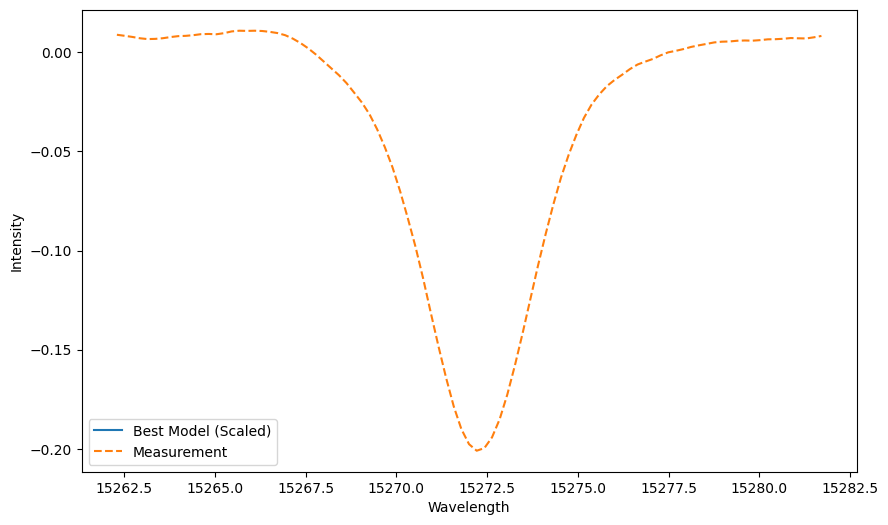

Best matching indices: (0, 0, 0, 0, 1)
Minimum L2 distance: nan

Best matching indices: (0, 0, 0, 0, 1)
Minimum L2 distance: nan

Best fit parameter values:
Temperature: 100.0
A/B base value: 0.001
C base value: 0.005
Fraction AB: 1.0
Fraction C: 1.0


In [20]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

c = 25

# Extract the measurement
measurement = measurements['PC1_1'][c:-c]
wavelengths = measurements['wavelength'][c:-c]

# Model spectra shape: (wavelength, index1, index2, index3, index4, index5)
shape = orig['spectra'].shape[1:]  # Skip the wavelength axis
distances = np.zeros(shape)

# Loop over all indices (excluding wavelength axis)
for i1 in range(shape[0]):
    for i2 in range(shape[1]):
        for i3 in range(shape[2]):
            for i4 in range(shape[3]):
                for i5 in range(shape[4]):
                    # Extract and smooth model spectrum
                    model_spec = gaussian_filter(orig['spectra'][:, i1, i2, i3, i4, i5][c:-c], 1)

                    # Scale the model to the measurement
                    scalar = np.dot(measurement, model_spec) / np.dot(model_spec, model_spec)

                    # Calculate L2 distance
                    distance = np.linalg.norm(measurement - scalar * model_spec)
                    distances[i1, i2, i3, i4, i5] = distance

# Find the indices of the best match (minimum distance)
best_indices = np.unravel_index(np.argmin(distances), distances.shape)
best_model_spec = gaussian_filter(orig['spectra'][:, best_indices[0], best_indices[1], best_indices[2], best_indices[3], best_indices[4]][c:-c], 1)
best_scalar = np.dot(measurement, best_model_spec) / np.dot(best_model_spec, best_model_spec)

# Extract best-fit parameter values
best_temperature = orig['temperatures'][best_indices[-1]]
best_ab = orig['ab_values'][best_indices[-2]]
best_c = orig['c_values'][best_indices[-3]]
best_fraction_ab = orig['fraction_ab'][best_indices[-4]]
best_fraction_c = orig['fraction_c'][best_indices[-5]]

# Plot the best match
plt.figure(figsize=(10, 6))
plt.plot(orig['wavelengths'][c:-c], best_scalar * best_model_spec, label='Best Model (Scaled)')
plt.plot(wavelengths, measurement, label='Measurement', linestyle='--')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.legend()
plt.show()

print(f"Best matching indices: {best_indices}")
print(f"Minimum L2 distance: {distances[best_indices]}")

# Print results
print("\nBest matching indices:", best_indices)
print("Minimum L2 distance:", distances[best_indices])
print("\nBest fit parameter values:")
print(f"Temperature: {best_temperature}")
print(f"A/B base value: {best_ab}")
print(f"C base value: {best_c}")
print(f"Fraction AB: {best_fraction_ab}")
print(f"Fraction C: {best_fraction_c}")


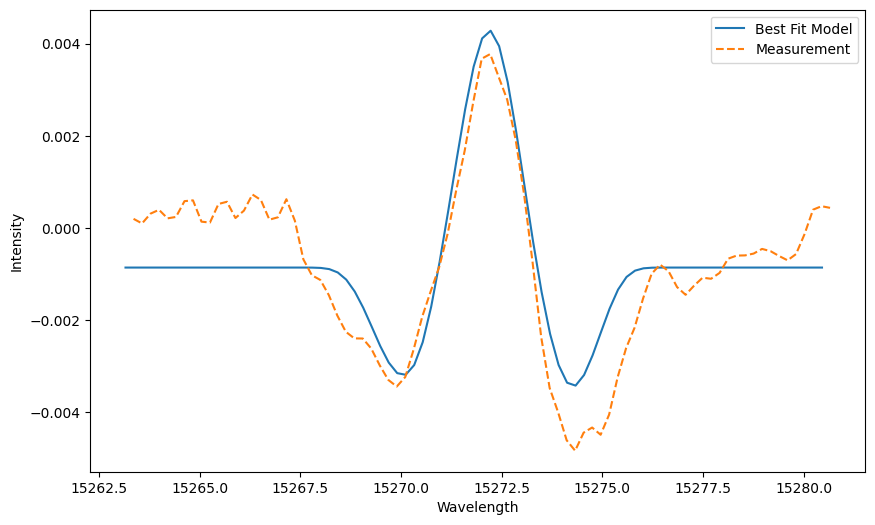


Best matching indices: (2, 0, 2, 1, 0)
Minimum L2 distance: 0.009403135293484868

Best fit parameter values:
Temperature: 10.0
A/B base value: 0.004
C base value: 0.012
Fraction AB: 1.0
Fraction C: 1.002

Fitted model coefficients:
Scalar: 48.09237261308108
Vertical offset: -0.0008577275307648591


In [8]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

c = 30
gf = 1  # Gaussian filter width

# Extract the measurement
measurement = measurements['PC2_2'][c:-c]
wavelengths = measurements['wavelength'][c:-c]

# Model spectra shape: (wavelength, index1, index2, index3, index4, index5)
shape = orig['spectra'].shape[1:]  # Skip the wavelength axis
distances = np.zeros(shape)

# Loop over all indices (excluding wavelength axis)
for i1 in range(shape[0]):
    for i2 in range(shape[1]):
        for i3 in range(shape[2]):
            for i4 in range(shape[3]):
                for i5 in range(shape[4]):
                    # Extract and smooth the model spectrum
                    model_spec = gaussian_filter(orig['spectra'][:, i1, i2, i3, i4, i5][c:-c], gf) - \
                                 gaussian_filter(eps['spectra'][:, i1, i2, i3, i4, i5][c:-c], gf)
                    
                    # Build design matrix: [model_spec, offset]
                    M = np.vstack([model_spec, np.ones_like(model_spec)]).T

                    # Solve for [scalar, offset] using least squares
                    coeffs, _, _, _ = np.linalg.lstsq(M, measurement, rcond=None)
                    scalar, offset = coeffs

                    # Compute fitted model
                    fit = scalar * model_spec + offset

                    # Calculate L2 distance
                    distance = np.linalg.norm(measurement - fit)
                    distances[i1, i2, i3, i4, i5] = distance

# Find the indices of the best match (minimum distance)
best_indices = np.unravel_index(np.argmin(distances), distances.shape)
best_model_spec = gaussian_filter(orig['spectra'][:, best_indices[0], best_indices[1], best_indices[2], best_indices[3], best_indices[4]][c:-c], gf) - \
                  gaussian_filter(eps['spectra'][:, best_indices[0], best_indices[1], best_indices[2], best_indices[3], best_indices[4]][c:-c], gf)

# Fit best model
M_best = np.vstack([best_model_spec, np.ones_like(best_model_spec)]).T
best_coeffs, _, _, _ = np.linalg.lstsq(M_best, measurement, rcond=None)
best_scalar, best_offset = best_coeffs

# Extract best-fit parameter values
best_temperature = orig['temperatures'][best_indices[-1]]
best_ab = orig['ab_values'][best_indices[-2]]
best_c = orig['c_values'][best_indices[-3]]
best_fraction_ab = orig['fraction_ab'][best_indices[-4]]
best_fraction_c = orig['fraction_c'][best_indices[-5]]

# Plot the best match
plt.figure(figsize=(10, 6))
plt.plot(orig['wavelengths'][c:-c]-0.2, best_scalar * best_model_spec + best_offset, label='Best Fit Model')
plt.plot(wavelengths, measurement, label='Measurement', linestyle='--')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.legend()
plt.show()

# Print results
print("\nBest matching indices:", best_indices)
print("Minimum L2 distance:", distances[best_indices])
print("\nBest fit parameter values:")
print(f"Temperature: {best_temperature}")
print(f"A/B base value: {best_ab}")
print(f"C base value: {best_c}")
print(f"Fraction AB: {best_fraction_ab}")
print(f"Fraction C: {best_fraction_c}")
print("\nFitted model coefficients:")
print(f"Scalar: {best_scalar}")
print(f"Vertical offset: {best_offset}")


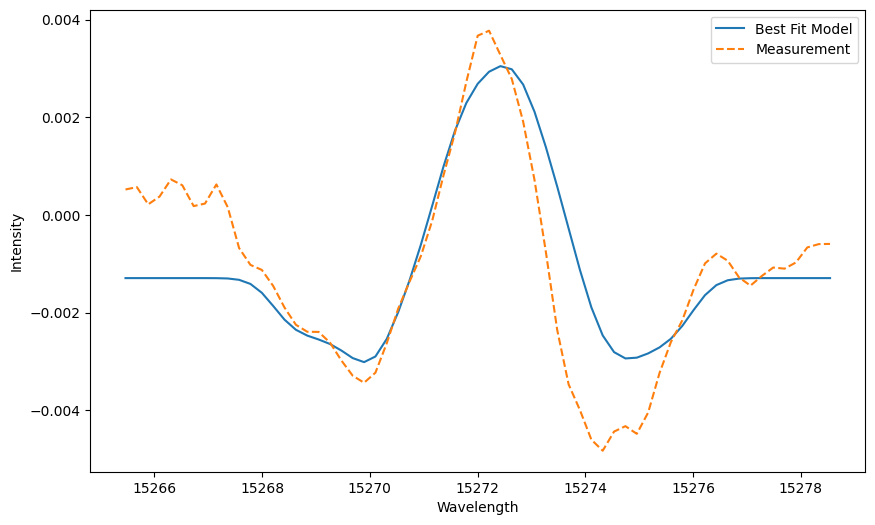


Best matching indices: (2, 0, 2, 0, 1)
Minimum L2 distance: 0.006384820296196674

Best fit parameter values:
Temperature: 20.0
A/B base value: 0.002
C base value: 0.012
Fraction AB: 1.0
Fraction C: 1.002

Fitted model coefficients:
Scalar: 95.85838356457026
Vertical offset: -0.001294265044890151


In [13]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

c = 40
gf = 1  # Gaussian filter width

# Extract the measurement
measurement = measurements['PC2_2'][c:-c]
wavelengths = measurements['wavelength'][c:-c]

# Model spectra shape: (wavelength, index1, index2, index3, index4, index5)
shape = orig['spectra'].shape[1:]  # Skip the wavelength axis
distances = np.zeros(shape)

# Loop over all indices (excluding wavelength axis)
for i1 in range(shape[0]):
    for i2 in range(shape[1]):
        for i3 in range(shape[2]):
            for i4 in range(shape[3]):
                for i5 in range(shape[4]):
                    # Extract and smooth the model spectrum
                    model_spec = gaussian_filter(orig['spectra'][:, i1, i2, i3, i4, i5][c:-c], gf) - \
                                 gaussian_filter(eps['spectra'][:, i1, i2, i3, i4, i5][c:-c], gf)
                    spec = gaussian_filter(orig['spectra'][:, i1, i2, i3, i4, i5][c:-c], gf)
                    # Build design matrix: [model_spec, offset]
                    M = np.vstack([spec, model_spec, np.ones_like(model_spec)]).T

                    # Solve for [scalar, offset] using least squares
                    coeffs, _, _, _ = np.linalg.lstsq(M, measurement, rcond=None)
                    scalar1, scalar2, offset = coeffs

                    # Compute fitted model
                    fit = scalar1*spec + scalar2 * model_spec + offset

                    # Calculate L2 distance
                    distance = np.linalg.norm(measurement - fit)
                    distances[i1, i2, i3, i4, i5] = distance

# Find the indices of the best match (minimum distance)
best_indices = np.unravel_index(np.argmin(distances), distances.shape)
best_model_spec = gaussian_filter(orig['spectra'][:, best_indices[0], best_indices[1], best_indices[2], best_indices[3], best_indices[4]][c:-c], gf) - \
                  gaussian_filter(eps['spectra'][:, best_indices[0], best_indices[1], best_indices[2], best_indices[3], best_indices[4]][c:-c], gf)

# Fit best model
M_best = np.vstack([best_model_spec, np.ones_like(best_model_spec)]).T
best_coeffs, _, _, _ = np.linalg.lstsq(M_best, measurement, rcond=None)
best_scalar, best_offset = best_coeffs

# Extract best-fit parameter values
best_temperature = orig['temperatures'][best_indices[-1]]
best_ab = orig['ab_values'][best_indices[-2]]
best_c = orig['c_values'][best_indices[-3]]
best_fraction_ab = orig['fraction_ab'][best_indices[-4]]
best_fraction_c = orig['fraction_c'][best_indices[-5]]

# Plot the best match
plt.figure(figsize=(10, 6))
plt.plot(orig['wavelengths'][c:-c], best_scalar * best_model_spec + best_offset, label='Best Fit Model')
plt.plot(wavelengths, measurement, label='Measurement', linestyle='--')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.legend()
plt.show()

# Print results
print("\nBest matching indices:", best_indices)
print("Minimum L2 distance:", distances[best_indices])
print("\nBest fit parameter values:")
print(f"Temperature: {best_temperature}")
print(f"A/B base value: {best_ab}")
print(f"C base value: {best_c}")
print(f"Fraction AB: {best_fraction_ab}")
print(f"Fraction C: {best_fraction_c}")
print("\nFitted model coefficients:")
print(f"Scalar: {best_scalar}")
print(f"Vertical offset: {best_offset}")


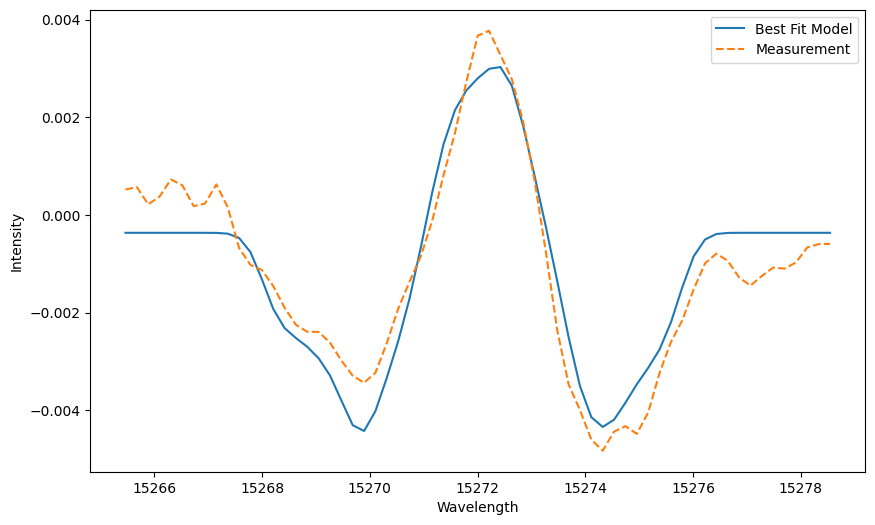


Best matching indices: (2, 0, 2, 0, 1)
Minimum L2 distance: 0.005139859415906912

Best fit parameter values:
Temperature: 20.0
A/B base value: 0.002
C base value: 0.012
Fraction AB: 1.0
Fraction C: 1.002

Fitted model coefficients:
Scalar 1: -0.2155989512254565
Scalar 2: 157.54025448535052
Vertical offset: -0.0003665380689769178


In [18]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

c = 40
gf = 0  # Gaussian filter width
dc = 1
# Extract the measurement
measurement = measurements['PC2_2'][c:-c]
wavelengths = measurements['wavelength'][c:-c]

# Model spectra shape: (wavelength, index1, index2, index3, index4, index5)
shape = orig['spectra'].shape[1:]  # Skip the wavelength axis
distances = np.zeros(shape)

# Loop over all indices (excluding wavelength axis)
for i1 in range(shape[0]):
    for i2 in range(shape[1]):
        for i3 in range(shape[2]):
            for i4 in range(shape[3]):
                for i5 in range(shape[4]):
                    # Extract and smooth the model spectra
                    spec = gaussian_filter(orig['spectra'][:, i1, i2, i3, i4, i5][c+dc:-(c-dc)], gf)
                    diff_spec = spec - gaussian_filter(eps['spectra'][:, i1, i2, i3, i4, i5][c+dc:-(c-dc)], gf)

                    # Build design matrix: [spec, diff_spec, offset]
                    M = np.vstack([spec, diff_spec, np.ones_like(spec)]).T

                    # Solve for [scalar1, scalar2, offset] using least squares
                    coeffs, _, _, _ = np.linalg.lstsq(M, measurement, rcond=None)
                    scalar1, scalar2, offset = coeffs

                    # Compute fitted model
                    fit = scalar1 * spec + scalar2 * diff_spec + offset

                    # Calculate L2 distance
                    distance = np.linalg.norm(measurement - fit)
                    distances[i1, i2, i3, i4, i5] = distance

# Find the indices of the best match (minimum distance)
best_indices = np.unravel_index(np.argmin(distances), distances.shape)

# Extract the best spectra
best_spec = gaussian_filter(orig['spectra'][:, best_indices[0], best_indices[1], best_indices[2], best_indices[3], best_indices[4]][c+dc:-(c-dc)], gf)
best_diff_spec = best_spec - gaussian_filter(eps['spectra'][:, best_indices[0], best_indices[1], best_indices[2], best_indices[3], best_indices[4]][c+dc:-(c-dc)], gf)

# Fit best model to retrieve best scalars and offset
M_best = np.vstack([best_spec, best_diff_spec, np.ones_like(best_spec)]).T
best_coeffs, _, _, _ = np.linalg.lstsq(M_best, measurement, rcond=None)
best_scalar1, best_scalar2, best_offset = best_coeffs

# Extract best-fit parameter values
best_temperature = orig['temperatures'][best_indices[-1]]
best_ab = orig['ab_values'][best_indices[-2]]
best_c = orig['c_values'][best_indices[-3]]
best_fraction_ab = orig['fraction_ab'][best_indices[-4]]
best_fraction_c = orig['fraction_c'][best_indices[-5]]

# Plot the best match
plt.figure(figsize=(10, 6))
plt.plot(orig['wavelengths'][c:-c], best_scalar1 * best_spec + best_scalar2 * best_diff_spec + best_offset, label='Best Fit Model')
plt.plot(wavelengths, measurement, label='Measurement', linestyle='--')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.legend()
plt.show()

# Print results
print("\nBest matching indices:", best_indices)
print("Minimum L2 distance:", distances[best_indices])
print("\nBest fit parameter values:")
print(f"Temperature: {best_temperature}")
print(f"A/B base value: {best_ab}")
print(f"C base value: {best_c}")
print(f"Fraction AB: {best_fraction_ab}")
print(f"Fraction C: {best_fraction_c}")
print("\nFitted model coefficients:")
print(f"Scalar 1: {best_scalar1}")
print(f"Scalar 2: {best_scalar2}")
print(f"Vertical offset: {best_offset}")


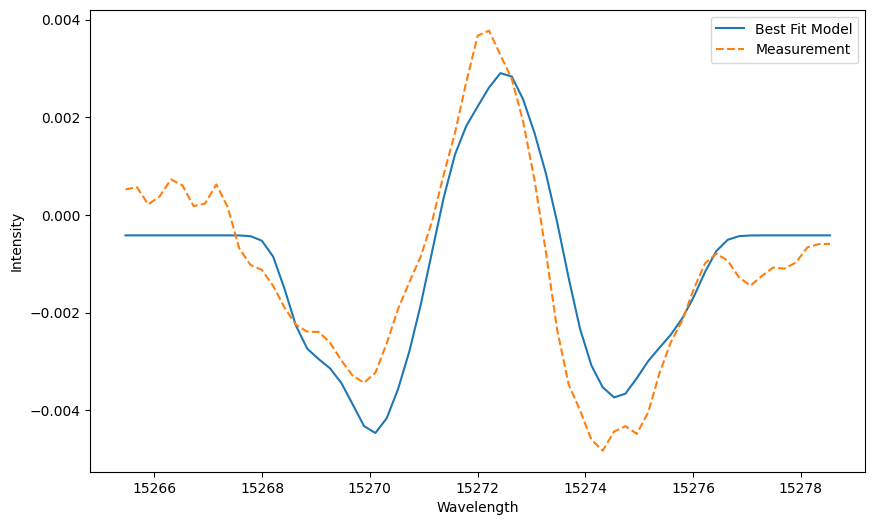


Best matching indices: [0, 2, 2, 0, 1]

Best fit parameter values:
Temperature: 20.0
A/B base value: 0.002
C base value: 0.012
Fraction AB: 1.002
Fraction C: 1.0

Fitted model coefficients:
Scalar 1: -0.20053242110771297
Scalar 2: 147.4129783539335
Vertical offset: -0.00041896103294745653


In [17]:

# Extract the best spectra
best_indices = [0, 2, 2, 0, 1]
best_spec = gaussian_filter(orig['spectra'][:, best_indices[0], best_indices[1], best_indices[2], best_indices[3], best_indices[4]][c:-c], gf)
best_diff_spec = best_spec - gaussian_filter(eps['spectra'][:, best_indices[0], best_indices[1], best_indices[2], best_indices[3], best_indices[4]][c:-c], gf)

# Fit best model to retrieve best scalars and offset
M_best = np.vstack([best_spec, best_diff_spec, np.ones_like(best_spec)]).T
best_coeffs, _, _, _ = np.linalg.lstsq(M_best, measurement, rcond=None)
best_scalar1, best_scalar2, best_offset = best_coeffs

# Extract best-fit parameter values
best_temperature = orig['temperatures'][best_indices[-1]]
best_ab = orig['ab_values'][best_indices[-2]]
best_c = orig['c_values'][best_indices[-3]]
best_fraction_ab = orig['fraction_ab'][best_indices[-4]]
best_fraction_c = orig['fraction_c'][best_indices[-5]]

# Plot the best match
plt.figure(figsize=(10, 6))
plt.plot(orig['wavelengths'][c:-c], best_scalar1 * best_spec + best_scalar2 * best_diff_spec + best_offset, label='Best Fit Model')
plt.plot(wavelengths, measurement, label='Measurement', linestyle='--')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.legend()
plt.show()

# Print results
print("\nBest matching indices:", best_indices)
# print("Minimum L2 distance:", distances[best_indices])
print("\nBest fit parameter values:")
print(f"Temperature: {best_temperature}")
print(f"A/B base value: {best_ab}")
print(f"C base value: {best_c}")
print(f"Fraction AB: {best_fraction_ab}")
print(f"Fraction C: {best_fraction_c}")
print("\nFitted model coefficients:")
print(f"Scalar 1: {best_scalar1}")
print(f"Scalar 2: {best_scalar2}")
print(f"Vertical offset: {best_offset}")
